In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")


In [2]:
df=pd.read_csv(r"C:\Users\sam\Desktop\oasis\datasets\car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
print('Number of owners :',df['Owner'].unique())
print('Transmission type:',df['Transmission'].unique())
print('Selling_type :',df['Selling_type'].unique())
print('Fuel_Type:', df['Fuel_Type'].unique())

Number of owners : [0 1 3]
Transmission type: ['Manual' 'Automatic']
Selling_type : ['Dealer' 'Individual']
Fuel_Type: ['Petrol' 'Diesel' 'CNG']


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
df[['Selling_Price','Present_Price','Driven_kms']].describe()

,Selling_Price,Present_Price,Driven_kms
count,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980
std,5.082812,8.642584,38886.883882
min,0.100000,0.320000,500.000000
25%,0.900000,1.200000,15000.000000
50%,3.600000,6.400000,32000.000000
75%,6.000000,9.900000,48767.000000
max,35.000000,92.600000,500000.000000


In [6]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [7]:
df.duplicated().sum()

2

In [8]:
df=df.drop_duplicates(subset=['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'])

In [9]:
df.duplicated().sum()

0

Exploration

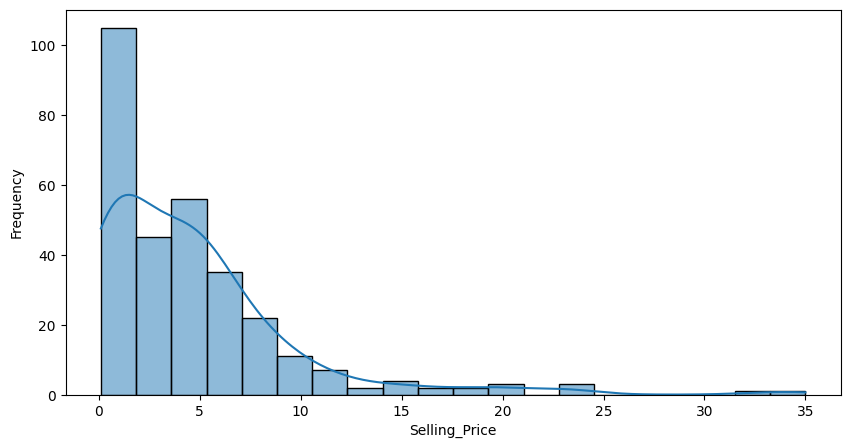

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df['Selling_Price'],bins=20,kde=True)
plt.xlabel('Selling_Price')
plt.ylabel('Frequency')
plt.show()


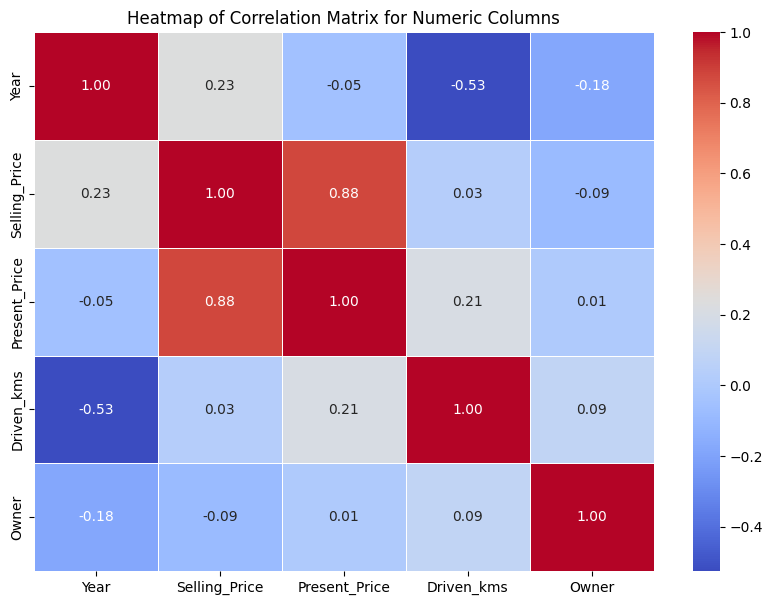

In [11]:

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix for Numeric Columns')
plt.show()


In [12]:
print(df['Fuel_Type'].value_counts())
print(df['Selling_type'].value_counts())
print(df['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


Data Encoding

In [13]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [14]:
df.iloc[80]

Car_Name         etios gd
Year                 2015
Selling_Price        4.75
Present_Price        7.85
Driven_kms          40000
Fuel_Type               1
Selling_type            0
Transmission            0
Owner                   0
Name: 81, dtype: object

In [15]:
x=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

In [16]:
x.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [17]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9493517418647062

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
model1=RandomForestRegressor()
model1.fit(X_train,y_train)
model1.score(X_test,y_test) 

0.9607648263428118